# Regression

## Simple Linear Regression

In [1]:
#import data
import pandas as pd
data = pd.read_excel('Data_HandsOn.xlsx', sheet_name='Regresi')  
data.head()

,X1,X2,Y
0,51.85,1727098,17
1,49.81,1693006,14
2,51.65,933989,16
3,52.05,923192,20
4,54.03,1197982,22


In [2]:
#create one independent variable and one dependent variable
data = data.drop(['X2'],axis=1)
data.rename(columns = {'X1':'X'}, inplace = True) 
data.head()

,X,Y
0,51.85,17
1,49.81,14
2,51.65,16
3,52.05,20
4,54.03,22


In [3]:
#define separated dependent and independent variable
X = data[['X']]
y = data['Y']

In [4]:
#train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
#process training data
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#prediction of data test
y_pred1 = model1.predict(X_test)
print(y_pred1)

[22.64210442 15.81705721 19.41475651 14.8193759  19.49033843 12.89203699
 18.79498479 15.32577475 13.32285392 17.81241985 16.15717585 18.48509892]


In [7]:
#get the parameter
print("The value of coefficients beta is:",model1.coef_)
print("The value of constanta is:",model1.intercept_)

The value of coefficients beta is: [0.75581918]
The value of constanta is: -20.477379836036548


In [8]:
#coefficient of determination
r_sq = model1.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.6953229839143119


## Multiple Linear Regression

In [9]:
#import data
import pandas as pd
data = pd.read_excel('Data_HandsOn.xlsx', sheet_name='Regresi')  
data.head()

,X1,X2,Y
0,51.85,1727098,17
1,49.81,1693006,14
2,51.65,933989,16
3,52.05,923192,20
4,54.03,1197982,22


In [10]:
#shape of matrix
print("The size of matrix data:")
print(data.shape)

The size of matrix data:
(35, 3)


In [11]:
#define separated dependent and independent variable
X = data[['X1','X2']]
y = data['Y']

In [12]:
print("The data type for the independent variable is:")
print(type(X),"\n")
print("The data type for the dependent variable is:")
print(type(y))

The data type for the independent variable is:
<class 'pandas.core.frame.DataFrame'> 

The data type for the dependent variable is:
<class 'pandas.core.series.Series'>


In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print("The following is an example of an independent variable for training data:")
print(X_train.head(),"\n")

print("The following is an example of an independent variable for testing data:")
print(X_test.head())

The following is an example of an independent variable for training data:
       X1       X2
0   51.85  1727098
4   54.03  1197982
17  48.68  1259590
27  52.78  1440698
5   49.41   718316 

The following is an example of an independent variable for testing data:
       X1       X2
26  57.05  1302813
13  48.02   890518
24  52.78   768583
21  46.70  1053786
15  52.88   865013


In [15]:
print("The following is an example of an dependent variable for training data:")
print(y_train[0:5],"\n")

print("The following is an example of an dependent variable for testing data:")
print(y_test[0:5])

The following is an example of an dependent variable for training data:
0     17
4     22
17    19
27    21
5     14
Name: Y, dtype: int64 

The following is an example of an dependent variable for testing data:
26    27
13    12
24    24
21    12
15    21
Name: Y, dtype: int64


In [16]:
print("The size of the matrix on the independent variable as a data train is:")
print(X_train.shape)
print("The size of the matrix on the independent variable as a data test is:")
print(X_test.shape)
print("The size of the matrix on the dependent variable as a data train is:")
print(y_train.shape)
print("The size of the matrix on the dependent variable as a data test is:")
print(y_test.shape)

The size of the matrix on the independent variable as a data train is:
(23, 2)
The size of the matrix on the independent variable as a data test is:
(12, 2)
The size of the matrix on the dependent variable as a data train is:
(23,)
The size of the matrix on the dependent variable as a data test is:
(12,)


In [17]:
#process training data
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#prediction of data test
y_pred2 = model2.predict(X_test)
print(y_pred2)

[22.71568974 15.95554686 19.87336689 14.73389013 19.8522867  13.67632645
 18.70932926 15.44211716 13.22922376 18.32135923 16.01679001 19.3758746 ]


In [19]:
#get the parameter
print("The value of coefficients beta is:",model2.coef_)
print("The value of constanta is:",model2.intercept_)

The value of coefficients beta is: [ 7.96317346e-01 -1.04440449e-06]
The value of constanta is: -21.353551104135015


In [20]:
#coefficient of determination
r_sq = model2.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7115611628028266


In [21]:
#model evaluation with MSE
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred2)

9.356508614790675

In [22]:
import numpy as np

#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#using MAPE to evaluate regression model
MAPE(y_test,y_pred2)

18.85024071717672

In [23]:
#normality of residual test
# Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(y_pred2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.951, p=0.652
Sample looks Gaussian (fail to reject H0)


for more complete output, you can use statsmodels module

## Regression with Statmodels

In [24]:
import statsmodels.api as sm
model3 = sm.OLS(y_train,X_train).fit()
model3.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              327.3
Date:                Tue, 23 Mar 2021   Prob (F-statistic):                    1.49e-16
Time:                        16:21:46   Log-Likelihood:                         -58.087
No. Observations:                  23   AIC:                                      120.2
Df Residuals:                      21   BIC:                                      122.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.3429      0.038      9.062      0.000       0.264       0.422
X2         -2.116e-08   1.62e-06     -0.013      0.990   -3.39e-06    3.35e-06
==============================================================================
Omnibus:                        8.504   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.013
Skew:                          -0.048   Prob(JB):                        0.366
Kurtosis:                       1.554   Cond. No.                     6.60e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression using Statmodels with Constanta

In [25]:
x = sm.add_constant(X)

In [26]:
print(X.head())
print(x.head())

      X1       X2
0  51.85  1727098
1  49.81  1693006
2  51.65   933989
3  52.05   923192
4  54.03  1197982
   const     X1       X2
0    1.0  51.85  1727098
1    1.0  49.81  1693006
2    1.0  51.65   933989
3    1.0  52.05   923192
4    1.0  54.03  1197982


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model3 = sm.OLS(y_train,X_train).fit()
model3.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     26.66
Date:                Tue, 23 Mar 2021   Prob (F-statistic):           2.28e-06
Time:                        16:21:46   Log-Likelihood:                -51.142
No. Observations:                  23   AIC:                             108.3
Df Residuals:                      20   BIC:                             111.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.3536      5.243     -4.072      0.001     -32.291     -10.416
X1             0.7963      0.115      6.926      0.000       0.556       1.036
X2         -1.044e-06   1.25e-06     -0.833      0.414   -3.66e-06    1.57e-06
==============================================================================
Omnibus:                        0.894   Durbin-Watson:                   2.324
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.807
Skew:                          -0.203   Prob(JB):                        0.668
Kurtosis:                       2.177   Cond. No.                     1.21e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#prediction
print('predicted response:', model3.predict(X_test)[0:5], sep='\n')

predicted response:
26    22.715690
13    15.955547
24    19.873367
21    14.733890
15    19.852287
dtype: float64


# Decision Tree

In [33]:
#import data
import pandas as pd
data = pd.read_excel('Data_HandsOn.xlsx', sheet_name='Klasifikasi')  

In [34]:
# Printing the dataset shape 
print ("Dataset Length: ", len(data)) 
print ("Dataset Shape: ", data.shape) 
      
# Printing the dataset obseravtions 
print ("Dataset: ","\n",data.head()) 

Dataset Length:  20
Dataset Shape:  (20, 5)
Dataset:  
    Gender  Region  Rasa  Total_payment  Tipe
0       1       0     1          15000     0
1       0       0     1          32000     1
2       0       0     1          45000     1
3       0       0     1          34000     1
4       0       0     1          54000     1


In [35]:
##define separated dependent and independent variable
X = data.values[:, 0:4] 
y = data.values[:, -1] 
print("This following are the independent variables:","\n",X[0:5])
print(y[0:5])

This following are the independent variables: 
 [[    1     0     1 15000]
 [    0     0     1 32000]
 [    0     0     1 45000]
 [    0     0     1 34000]
 [    0     0     1 54000]]
[0 1 1 1 1]


In [36]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100) 

In [37]:
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [38]:
#predictions
y_pred = clf_gini.predict(X_test) 
print("y actual:", y_test)
print("y prediction", y_pred)

y actual: [1 0 1 0 0 0]
y prediction [1 0 0 1 0 0]


In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix: ","\n", confusion_matrix(y_test, y_pred)) 

Confusion Matrix:  
 [[3 1]
 [1 1]]


In [40]:
#confusion matrix
from sklearn.metrics import accuracy_score 
print ("Accuracy :","\n",accuracy_score(y_test,y_pred)*100) 

Accuracy : 
 66.66666666666666


In [41]:
#report of predictions
from sklearn.metrics import classification_report 
print("Report : ","\n", classification_report(y_test, y_pred))

Report :  
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6



In [42]:
#plot tree
from sklearn import tree
tree.plot_tree(clf_gini)

[Text(248.0, 277.2, 'X[3] <= 23000.0\ngini = 0.49\nsamples = 14\nvalue = [6, 8]'),
 Text(124.0, 92.39999999999998, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(372.0, 92.39999999999998, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]')]

In [43]:
data.head()

,Gender,Region,Rasa,Total_payment,Tipe
0,1,0,1,15000,0
1,0,0,1,32000,1
2,0,0,1,45000,1
3,0,0,1,34000,1
4,0,0,1,54000,1


In [44]:
fn = ['Gender', 'Region', 'Flavour','Total_Payment']

In [45]:
cn = ['Small','Large']

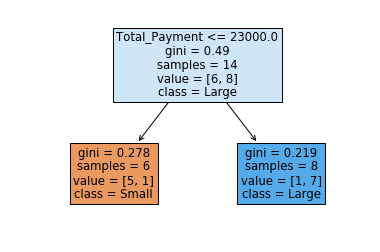

In [46]:
#plot tree but more beautiful
tree.plot_tree(clf_gini, feature_names = fn, class_names=cn, filled = True);

No Skill: ROC AUC=0.500
Decision tree: ROC AUC=0.625


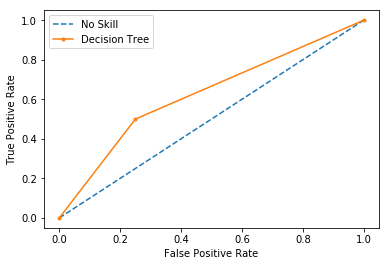

In [47]:
#create probabilty of predictions
y_prob = clf_gini.predict_proba(X_test)
y_prob = y_prob[:,1]

# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_prob = [0 for _ in range(len(y_prob))]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_prob)
dt_auc = roc_auc_score(y_test, y_prob)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision tree: ROC AUC=%.3f' % (dt_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prob)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Ensemble Learning

## Random Forest

In [48]:
#import data
import pandas as pd
data = pd.read_excel('Data_HandsOn.xlsx', sheet_name='Klasifikasi')  

In [49]:
#describing data
data.head()

,Gender,Region,Rasa,Total_payment,Tipe
0,1,0,1,15000,0
1,0,0,1,32000,1
2,0,0,1,45000,1
3,0,0,1,34000,1
4,0,0,1,54000,1


In [50]:
#convert to array
import numpy as np
labels = np.array(data['Tipe'])
features= data.drop('Tipe', axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [51]:
labels

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [52]:
features

array([[    1,     0,     1, 15000],
       [    0,     0,     1, 32000],
       [    0,     0,     1, 45000],
       [    0,     0,     1, 34000],
       [    0,     0,     1, 54000],
       [    1,     0,     1, 10000],
       [    1,     0,     0,  8000],
       [    0,     0,     0, 27000],
       [    0,     0,     1, 19000],
       [    0,     0,     1, 28000],
       [    1,     1,     1, 13000],
       [    1,     1,     1, 15000],
       [    1,     1,     0, 19000],
       [    1,     1,     0,  7000],
       [    1,     1,     0, 11000],
       [    0,     1,     0, 43000],
       [    0,     1,     1, 34000],
       [    0,     1,     1, 52000],
       [    0,     1,     1, 28000],
       [    1,     1,     0, 10000]], dtype=int64)

In [53]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [54]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (15, 4)
Training Labels Shape: (15,)
Testing Features Shape: (5, 4)
Testing Labels Shape: (5,)


In [55]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)

In [56]:
# predictions
rfc_predict = rfc.predict(X_test)
print("y actual:",y_test)
print("y prediction:",rfc_predict)

y actual: [0 1 1 1 0]
y prediction: [1 0 0 1 1]


In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[0 2]
 [2 1]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.33      0.33         3

    accuracy                           0.20         5
   macro avg       0.17      0.17      0.17         5
weighted avg       0.20      0.20      0.20         5





In [58]:
fn = ["Gender","Region","Rasa","Total_payment"]
cn = ["Small","Large"]

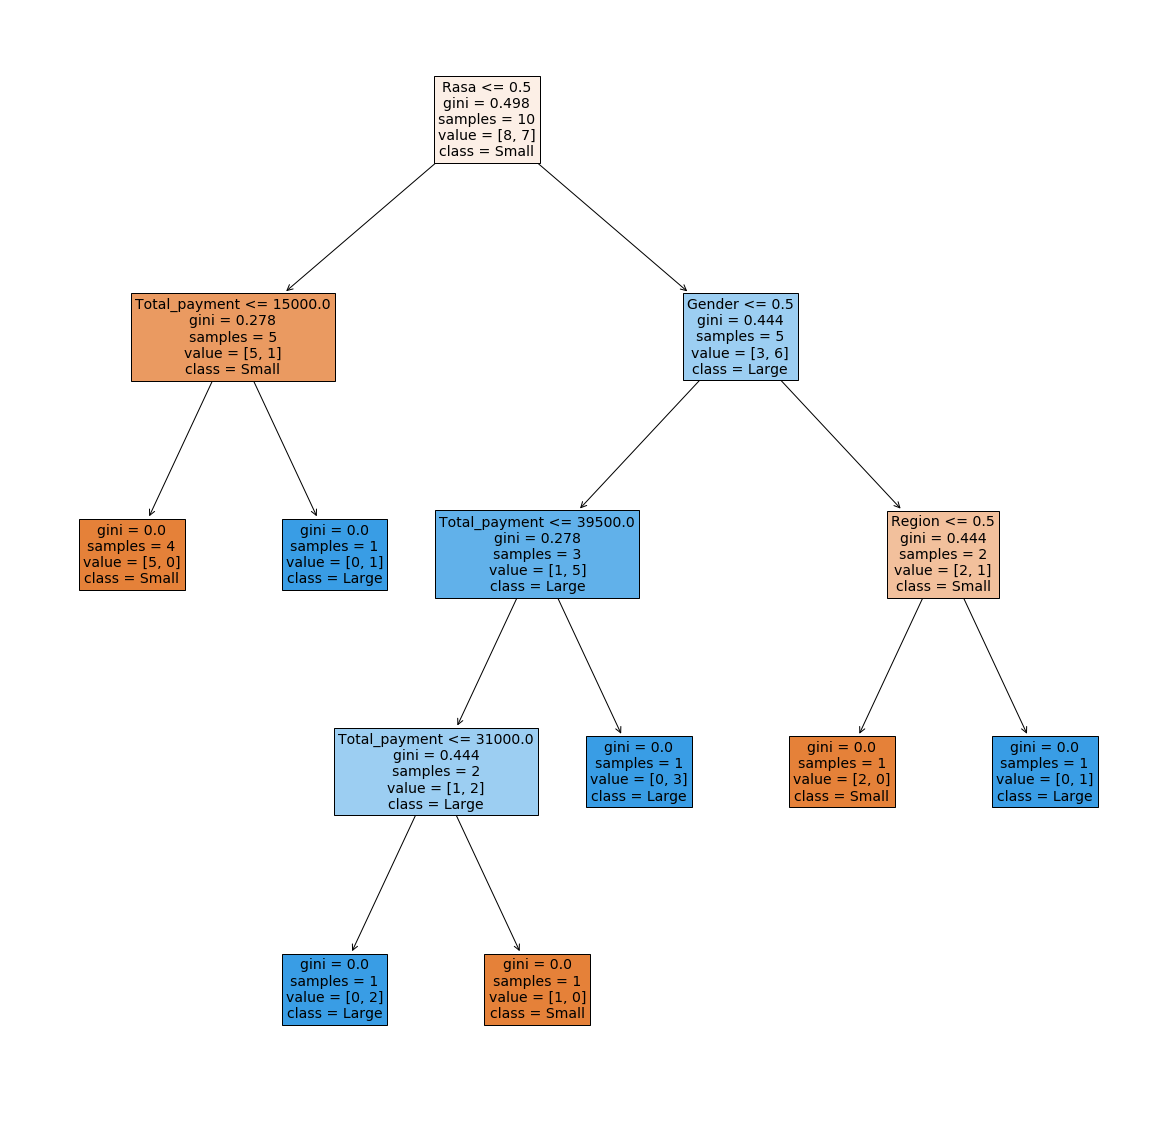

In [59]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[1], feature_names=fn, class_names=cn, filled=True)

## XGboost

In [60]:
#import data
import pandas as pd
data = pd.read_excel('Data_HandsOn.xlsx', sheet_name='Klasifikasi')  
data.head()

,Gender,Region,Rasa,Total_payment,Tipe
0,1,0,1,15000,0
1,0,0,1,32000,1
2,0,0,1,45000,1
3,0,0,1,34000,1
4,0,0,1,54000,1


In [61]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
#define separated dependent and independent variable
X = data.values[:, 0:4] 
y = data.values[:, -1] 
print("This following are the independent variables:","\n",X[0:5])
print(y[0:5])

This following are the independent variables: 
 [[    1     0     1 15000]
 [    0     0     1 32000]
 [    0     0     1 45000]
 [    0     0     1 34000]
 [    0     0     1 54000]]
[0 1 1 1 1]


In [63]:
#train test split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [64]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
# make predictions for test data
y_pred = model.predict(X_test)
print("y actual:",y_test)
print("y prediction:",y_pred)

y actual: [1 1 1 0 1 0 0]
y prediction: [1 1 1 0 0 0 1]


In [66]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.43%


# Handling Imbalance Data

## SMOTE

In [67]:
#pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'F:\anaconda\python.exe -m pip install --upgrade pip' command.


In [68]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [70]:
import numpy
unique, counts = numpy.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 159, 1: 267}

In [72]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [73]:
unique, counts = numpy.unique(y_train_SMOTE, return_counts=True)
dict(zip(unique, counts))

{0: 267, 1: 267}

## Random Oversampling

In [74]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

import numpy
unique, counts = numpy.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)
unique, counts = numpy.unique(y_over, return_counts=True)
print(dict(zip(unique, counts)))

{0: 159, 1: 267}
{0: 267, 1: 267}


## Random Undersampling

In [75]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X_train, y_train)

from collections import Counter
print(Counter(y_train))
print(Counter(y_over))

Counter({1: 267, 0: 159})
Counter({0: 159, 1: 159})
